In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Conjunto de datos para probar nuestros algoritmos...

1. Se trata de un conjunto de datos reales sobre el estado de los conocimientos de los estudiantes sobre el tema de las máquinas eléctricas de corriente continua. El conjunto de datos se ha obtenido de la tesis doctoral.
2. User Knowledge Modeling: https://archive-beta.ics.uci.edu/ml/datasets/user+knowledge+modeling (En realidad yo lo he modificado un poco para dejarlo más limpio y trabajar más rápido)
3. Las características son:
- STG (El grado de tiempo de estudio para las materias del objeto de la meta),
- SCG (El grado de repetición del usuario para las materias del objeto de la meta)
- STR (El grado de tiempo de estudio del usuario para los objetos relacionados con el objeto de la meta)
- LPR (El rendimiento en el examen del usuario para los objetos relacionados con el objeto de la meta)
- PEG (El rendimiento en el examen del usuario para los objetos de la meta)
- UNS (El nivel de conocimiento del usuario)
4. Vamos a repetir lo visto en clase con esta data y vamos a verificar que efectivamente nuestro algoritmos pueden identificar los grupos que ellos han identificado. Habrá que definir una métrica para luego medir con que grado de confianza hemos hecho algoritmos que de verdad clasifican bien.

In [90]:
data=pd.read_csv("D:/MaestriaEA/D/UserKnowledgeModeling.csv")

In [91]:
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,Very Low
1,0.05,0.05,0.55,0.60,0.14,Low
2,0.08,0.18,0.63,0.60,0.85,High
3,0.20,0.20,0.68,0.67,0.85,High
4,0.22,0.22,0.90,0.30,0.90,High


5. Lo primero es que vamos a codificar nuestro atributo de clasificación (la última columna). Para ello vamos a hacer algo como lo siguiente:

In [92]:
data["UNS"].value_counts()

Low         129
Middle      122
High        102
Very Low     26
very_low     24
Name: UNS, dtype: int64

In [93]:
data["UNS"]=data["UNS"].replace("Very Low",0)
data["UNS"]=data["UNS"].replace("very_low",0)
data["UNS"]=data["UNS"].replace("Low",1)
data["UNS"]=data["UNS"].replace("Middle",2)
data["UNS"]=data["UNS"].replace("High",3)
#.....
data

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,0
1,0.05,0.05,0.55,0.60,0.14,1
2,0.08,0.18,0.63,0.60,0.85,3
3,0.20,0.20,0.68,0.67,0.85,3
4,0.22,0.22,0.90,0.30,0.90,3
...,...,...,...,...,...,...
398,0.61,0.78,0.69,0.92,0.58,3
399,0.78,0.61,0.71,0.19,0.60,2
400,0.54,0.82,0.71,0.29,0.77,3
401,0.50,0.75,0.81,0.61,0.26,2


In [94]:
data["UNS"].value_counts()

1    129
2    122
3    102
0     50
Name: UNS, dtype: int64

6. Por ahora nos olvidamos de la columna UNS y hacemos nuestros algoritmos de agrupamiento y clustering y luego vemos que tan fiable han sido nuestro modelos

In [95]:
data.describe()

,STG,SCG,STR,LPR,PEG,UNS
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.353141,0.355940,0.457655,0.431342,0.456360,1.684864
std,0.212018,0.215531,0.246684,0.257545,0.266775,0.986195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000,1.000000
50%,0.300000,0.300000,0.440000,0.330000,0.400000,2.000000
75%,0.480000,0.510000,0.680000,0.650000,0.660000,3.000000
max,0.990000,0.900000,0.950000,0.990000,0.990000,3.000000


In [98]:
print("La cantidad de datos es: ",len(data))
print("Existen {} datos en el dataset".format(len(data)))

La cantidad de datos es:  403
Existen 403 datos en el dataset


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     403 non-null    float64
 1   SCG     403 non-null    float64
 2   STR     403 non-null    float64
 3   LPR     403 non-null    float64
 4   PEG     403 non-null    float64
 5   UNS     403 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 19.0 KB


In [100]:
np.unique(data["UNS"],return_counts=True)

(array([0, 1, 2, 3], dtype=int64), array([ 50, 129, 122, 102], dtype=int64))

In [101]:
pd.DataFrame(np.unique(data["UNS"],return_counts=True),columns=["Muy bajo","Bajo","Medio","Alto"])

,Muy bajo,Bajo,Medio,Alto
0,0,1,2,3
1,50,129,122,102


In [102]:
pd.DataFrame(np.unique(data["UNS"],return_counts=True),columns=["Muy bajo","Bajo","Medio","Alto"]).T

,0,1
Muy bajo,0,50
Bajo,1,129
Medio,2,122
Alto,3,102


In [103]:
data0=data[["STG","SCG","STR","LPR","PEG"]]
data0.head()

,STG,SCG,STR,LPR,PEG
0,0.00,0.10,0.50,0.26,0.05
1,0.05,0.05,0.55,0.60,0.14
2,0.08,0.18,0.63,0.60,0.85
3,0.20,0.20,0.68,0.67,0.85
4,0.22,0.22,0.90,0.30,0.90


Vamos aplicar 4 algoritmos de Clustering para el conjunto de datos 'data0'
1. K-Means
2. Clustering jerarquico
3. DBSCAN
4. Shift Means

# Aplicabdo K-Means ...

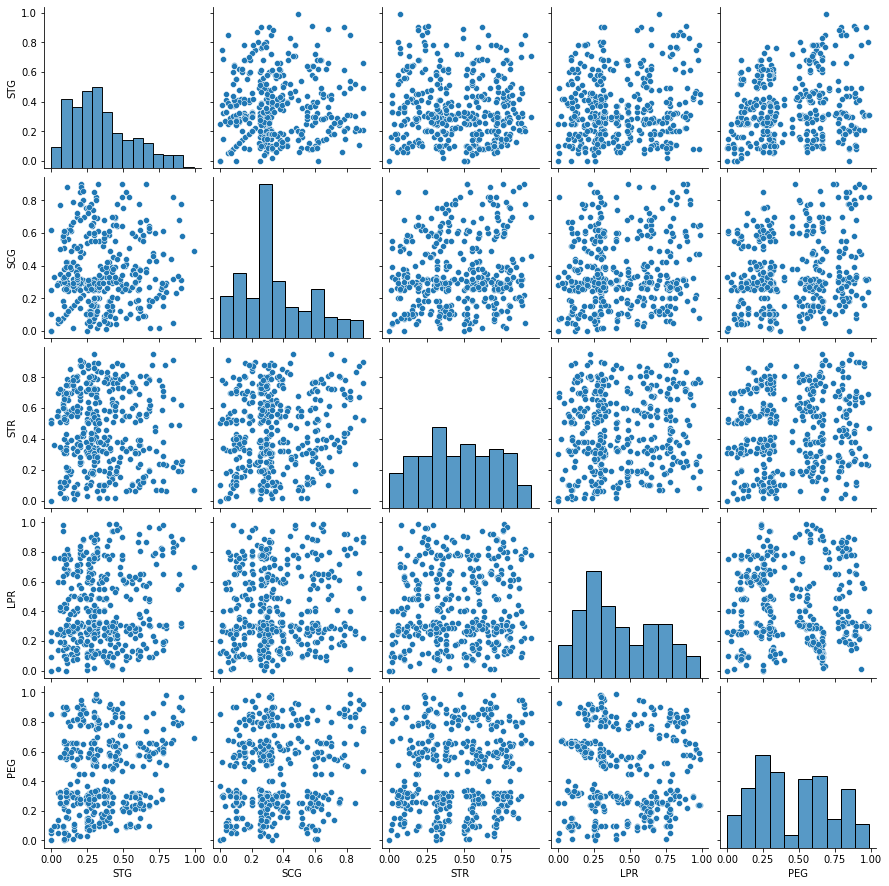

In [104]:
# Let's see our data in a detailed way with pairplot
sns.pairplot(data0, aspect=1)
plt.show()

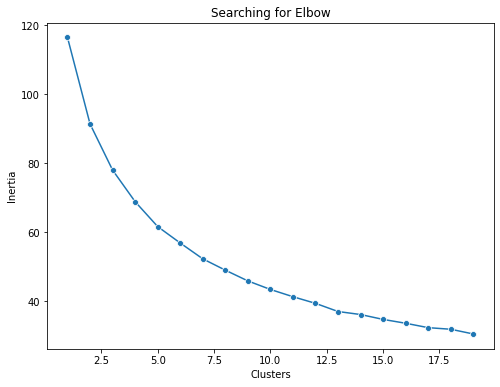

In [105]:
from sklearn.cluster import KMeans

clusters = []
for i in range(1, 20):
    km = KMeans(n_clusters=i).fit(data0)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=list(range(1, 20)), y=clusters, ax=ax, marker="o")
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

C:\Users\hmarbello\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


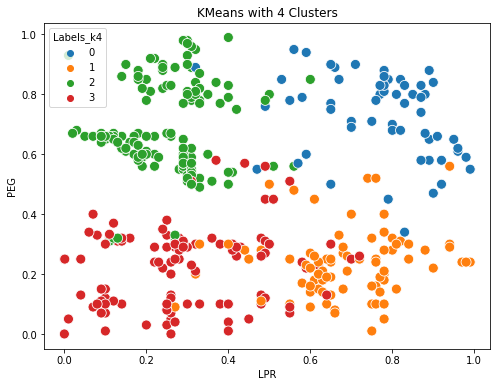

In [106]:
# 4 cluster
km4 = KMeans(n_clusters=4).fit(data0)
data['Labels_k4'] = km4.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k4'], palette=sns.color_palette('tab10', 4), s=100)
plt.title('KMeans with 4 Clusters')
plt.show()

# Parece que tomar 4 grupos es la mejor opción 
- Cluster 0: Alto LPR y PEG Alto
- Cluster 1: Bajo LPR y PEG Alto
- Cluster 2: Alto LPR y PEG Bajo
- Cluster 3: Bajo LPR y PEG Bajo

C:\Users\hmarbello\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


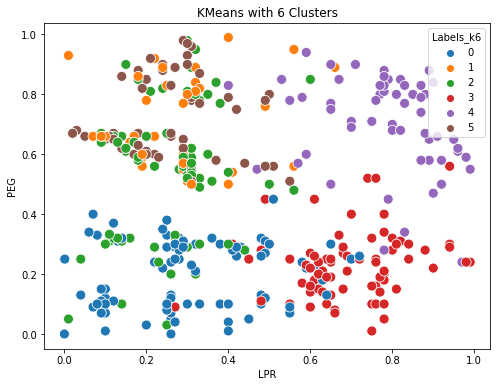

In [107]:
# 6 cluster
km6 = KMeans(n_clusters=6).fit(data0)
data['Labels_k6'] = km6.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k6'], palette=sns.color_palette('tab10', 6), s=100)
plt.title('KMeans with 6 Clusters')
plt.show()

C:\Users\hmarbello\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


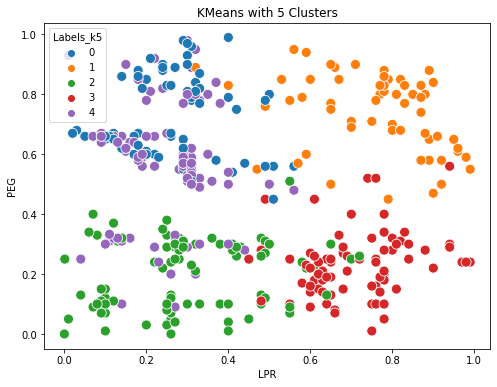

In [108]:
# 5 cluster
km5 = KMeans(n_clusters=5).fit(data0)
data['Labels_k5'] = km5.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k5'], palette=sns.color_palette('tab10', 5), s=100)
plt.title('KMeans with 5 Clusters')
plt.show()

# Aplicando Clustering jerarquico...

C:\Users\hmarbello\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


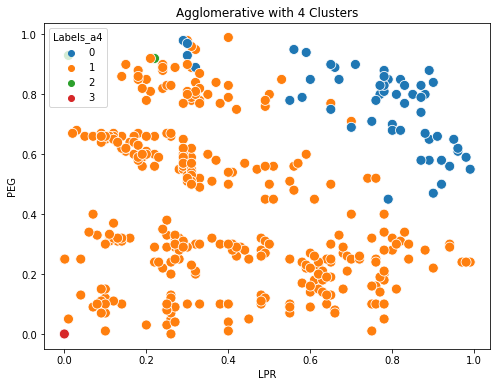

In [109]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=4, linkage='average').fit(data0)

data['Labels_a4'] = agglom.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_a4'], palette=sns.color_palette('tab10', 4), s=100)
plt.title('Agglomerative with 4 Clusters')
plt.show()

In [110]:
len(data[data["Labels_a4"]==2])

2

In [111]:
data[data["Labels_a4"]==2]

,STG,SCG,STR,LPR,PEG,UNS,Labels_k4,Labels_k6,Labels_k5,Labels_a4
54,0.210,0.90,0.90,0.22,0.92,3,2,1,4,2
331,0.495,0.82,0.67,0.01,0.93,3,2,1,4,2


# Aplicando DBSCAN

C:\Users\hmarbello\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


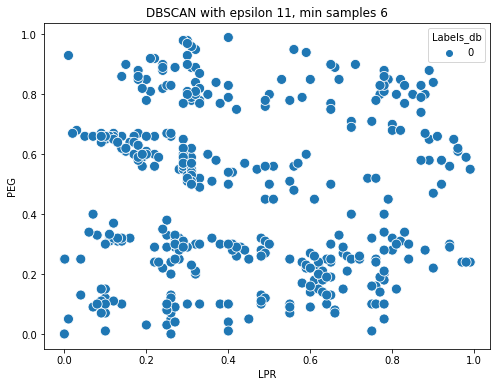

In [112]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=11, min_samples=6).fit(data0)

data['Labels_db'] = db.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_db'], palette=sns.color_palette('tab10', np.unique(db.labels_).shape[0]), s=100)
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

# Aplicando MeanShift ...

C:\Users\hmarbello\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


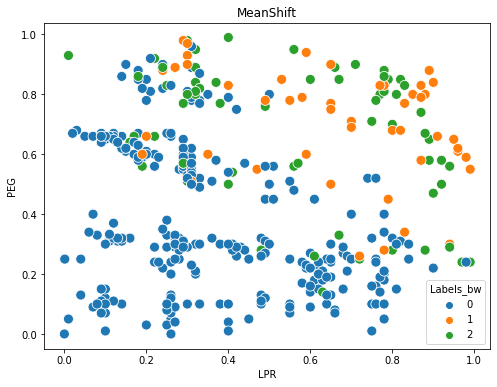

In [113]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(data0, quantile=0.0869)
ms = MeanShift(bandwidth=bandwidth).fit(data0)

data['Labels_bw'] = ms.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_bw'], palette=sns.color_palette('tab10', np.unique(ms.labels_).shape[0]), s=100)
plt.plot()
plt.title('MeanShift')
plt.show()

C:\Users\hmarbello\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hmarbello\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hmarbello\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an 

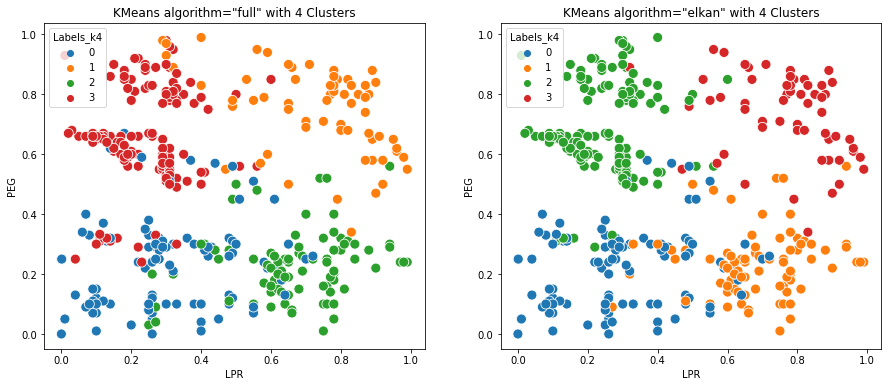

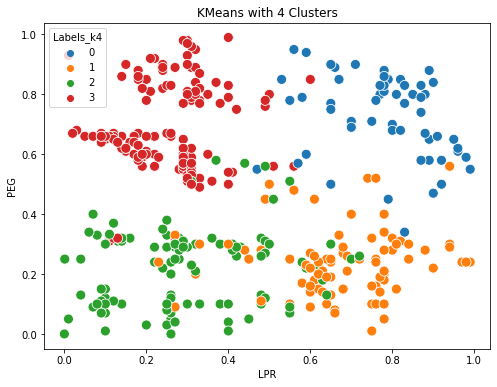

In [116]:
# 4 cluster
km4 = KMeans(n_clusters=4,algorithm="full").fit(data0)
data['Labels_k4'] = km4.labels_
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(121)
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k4'], palette=sns.color_palette('tab10', 4), s=100)
ax.set_title('KMeans algorithm="full" with 4 Clusters')

km4 = KMeans(n_clusters=4,algorithm="elkan",).fit(data0)
data['Labels_k4'] = km4.labels_
ax = fig.add_subplot(122)
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k4'], palette=sns.color_palette('tab10', 4), s=100)
ax.set_title('KMeans algorithm="elkan" with 4 Clusters')

# 4 cluster
km4 = KMeans(n_clusters=4).fit(data0)
data['Labels_k4'] = km4.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k4'], palette=sns.color_palette('tab10', 4), s=100)
plt.title('KMeans with 4 Clusters')


plt.show()

In [117]:
from sklearn.metrics import accuracy_score


In [118]:
data["UNS"].value_counts()

1    129
2    122
3    102
0     50
Name: UNS, dtype: int64

In [119]:
len(data[data["Labels_k4"]==1])

93

In [84]:
data["UNS_Kmeans"]=data["Labels_k4"].replace(2,1)
data["UNS_Kmeans"]=data["Labels_k4"].replace(3,0)
data["UNS_Kmeans"]=data["Labels_k4"].replace(1,3)
data["UNS_Kmeans"]=data["Labels_k4"].replace(0,2)

In [82]:
data

,STG,SCG,STR,LPR,PEG,UNS,Labels_k4,Labels_k6,Labels_k5,Labels_a5,Labels_a4,Labels_db,Labels_bw,UNS_Kmeans
0,0.00,0.10,0.50,0.26,0.05,0,1,4,1,0,1,0,0,1
1,0.05,0.05,0.55,0.60,0.14,1,1,1,0,0,1,0,0,1
2,0.08,0.18,0.63,0.60,0.85,3,2,3,3,1,0,0,2,2
3,0.20,0.20,0.68,0.67,0.85,3,3,3,2,1,0,0,2,3
4,0.22,0.22,0.90,0.30,0.90,3,2,3,3,0,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.61,0.78,0.69,0.92,0.58,3,3,0,2,1,0,0,2,3
399,0.78,0.61,0.71,0.19,0.60,2,2,3,3,0,1,0,1,2
400,0.54,0.82,0.71,0.29,0.77,3,2,3,3,0,1,0,2,2
401,0.50,0.75,0.81,0.61,0.26,2,1,1,0,0,1,0,2,1


In [161]:
a=pd.DataFrame(data["Labels_k4"].value_counts())

In [171]:
#len(data[data["Labels_k4"]==1])
b=pd.DataFrame(data["UNS"].value_counts())
c=pd.concat([a,b],axis=1)
c

,Labels_k4,UNS
3,135,102
2,120,122
1,93,129
0,55,50


In [193]:
error0=abs(len(data[data["Labels_k4"]==0]) - len(data[data["UNS"]==0]))/len(data[data["UNS"]==0])*100
error3=abs(len(data[data["Labels_k4"]==1]) - len(data[data["UNS"]==3]))/len(data[data["UNS"]==3])*100
error1=abs(len(data[data["Labels_k4"]==3]) - len(data[data["UNS"]==1]))/len(data[data["UNS"]==1])*100
error2=abs(len(data[data["Labels_k4"]==2]) - len(data[data["UNS"]==2]))/len(data[data["UNS"]==2])*100
print(" Error Muy Bajo \t=",round(error0,2),"%\n","Error Bajo \t\t=",round(error1,2),"%\n","Error Medio \t\t=",
      round(error2,2),"%\n","Error Alto \t\t=",round(error3,2),"%\n","================================\n","Error conjunto \t=",
      round((error0+error1+error2+error3)/4,2),"%")

 Error Muy Bajo 	= 10.0 %
 Error Bajo 		= 4.65 %
 Error Medio 		= 1.64 %
 Error Alto 		= 8.82 %
 Error conjunto 	= 6.28 %


In [192]:
round((error0+error1+error2+error3)/4,2)

6.28

In [133]:
data1=data.copy()

In [172]:
data1["UNS_Kmeans"]=data1["Labels_k4"].replace(3,4)
data1["UNS_Kmeans"]=data1["UNS_Kmeans"].replace(1,3)
data1["UNS_Kmeans"]=data1["UNS_Kmeans"].replace(4,1)
data1["UNS_Original"]=data1["UNS"].replace(0,"Muy Bajo")
data1["UNS_Original"]=data1["UNS_Original"].replace(1,"Bajo")
data1["UNS_Original"]=data1["UNS_Original"].replace(2,"Medio")
data1["UNS_Original"]=data1["UNS_Original"].replace(3,"Alto")
data1

,STG,SCG,STR,LPR,PEG,UNS,Labels_k4,Labels_k6,Labels_k5,Labels_a4,Labels_db,Labels_bw,UNS_Kmeans,UNS_Original
0,0.00,0.10,0.50,0.26,0.05,0,2,0,2,1,0,0,2,Muy Bajo
1,0.05,0.05,0.55,0.60,0.14,1,1,3,3,1,0,0,3,Bajo
2,0.08,0.18,0.63,0.60,0.85,3,3,2,1,0,0,2,1,Alto
3,0.20,0.20,0.68,0.67,0.85,3,0,4,1,0,0,2,0,Alto
4,0.22,0.22,0.90,0.30,0.90,3,3,2,4,1,0,2,1,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.61,0.78,0.69,0.92,0.58,3,0,4,1,0,0,2,0,Alto
399,0.78,0.61,0.71,0.19,0.60,2,3,1,4,1,0,1,1,Medio
400,0.54,0.82,0.71,0.29,0.77,3,3,1,4,1,0,2,1,Alto
401,0.50,0.75,0.81,0.61,0.26,2,1,3,3,1,0,2,3,Medio


In [173]:
from sklearn.metrics import accuracy_score, mean_absolute_percentage_error

In [176]:
(1 - accuracy_score(data1["UNS_Kmeans"],data1["UNS"]))*100

96.52605459057072

In [177]:
pd.DataFrame(data["Labels_k4"].value_counts())

,Labels_k4
3,135
2,120
1,93
0,55


In [178]:
pd.DataFrame(data["UNS"].value_counts())

,UNS
1,129
2,122
3,102
0,50
